# Task 2: User Engagement Analysis & Task 3: Experience Analytics

**Loading the Pre-Processed data saved as Excel File in Task 1**

In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 2: Loading the Data saved in Task 1
df = pd.read_excel(r"pre-processed_data.xlsx")

# Show all columns
pd.set_option('display.max_columns', None)
# Set to allow auto-fit
pd.set_option('display.max_colwidth', None)
# Prevent scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

# Displaying first few rows
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,42,5,23,44,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,990,340,811,149,965,141,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),990,340,811,149,965,141,971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,110,18,6,9,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),990,340,811,149,965,141,751,695,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,110,18,44,44,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,3330,37882,1321509685,undefined,undefined,990,340,811,149,965,141,17,207,644121,13372,9023734,2788027,1439754,631229,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,110,18,6,9,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,0,0,1089009389,Samsung,Samsung Sm-G390F,990,340,811,149,965,141,607,604,862600,50188,6248284,1500559,1936496,173853,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


In [6]:
df.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

# Summary of Findings

### **Process**
1. **Import Libraries**: 
   - Utilized `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn` for data manipulation and visualization.

2. **Load Data**: 
   - Used `pd.read_excel(r"pre-processed_data.xlsx")` to load the dataset.

3. **Data Display Settings**: 
   - Set display options:
     - `pd.set_option('display.max_columns', None)` to show all columns.
     - `pd.set_option('display.max_colwidth', None)` for auto-fit.
     - `pd.set_option('display.float_format', '{:.0f}'.format)` to prevent scientific notation.

4. **Initial Data Exploration**: 
   - Displayed first few rows with `df.head()`.
   - Checked data types using `df.dtypes`.

### **Outcome**
1. **Data Overview**:
     - **Data Types**: Confirmed the structure, including key metrics such as:
     - `Avg Bearer TP DL (kbps)`: float64
     - `Avg Bearer TP UL (kbps)`: float64
     - `TCP DL Retrans. Vol (Bytes)`: float64

# Task 2.1 - Engagement Metrics Analysis
**Aggregate metrics per customer ID (MSISDN) and report the top 10 customers per engagement metric**

In [72]:
import pandas as pd

def engagement_metrics_analysis(df):
    """Analyzes user engagement metrics."""
    
    # Aggregate user data
    user_engagement_data = df.groupby('MSISDN/Number').agg(
        session_frequency=('Bearer Id', 'count'),
        session_duration=('Dur. (ms)', 'sum'),
        total_dl=('Total DL (Bytes)', 'sum'),
        total_ul=('Total UL (Bytes)', 'sum'),
        total_social_media_dl=('Social Media DL (Bytes)', 'sum'),
        total_social_media_ul=('Social Media UL (Bytes)', 'sum'),
        total_youtube_dl=('Youtube DL (Bytes)', 'sum'),
        total_youtube_ul=('Youtube UL (Bytes)', 'sum'),
        total_netflix_dl=('Netflix DL (Bytes)', 'sum'),
        total_netflix_ul=('Netflix UL (Bytes)', 'sum'),
        total_google_dl=('Google DL (Bytes)', 'sum'),
        total_google_ul=('Google UL (Bytes)', 'sum'),
        total_email_dl=('Email DL (Bytes)', 'sum'),
        total_email_ul=('Email UL (Bytes)', 'sum'),
        total_gaming_dl=('Gaming DL (Bytes)', 'sum'),
        total_gaming_ul=('Gaming UL (Bytes)', 'sum'),
        total_other_dl=('Other DL (Bytes)', 'sum'),
        total_other_ul=('Other UL (Bytes)', 'sum')
    ).reset_index()

    # Calculate total traffic and other metrics
    user_engagement_data['total_traffic'] = user_engagement_data['total_dl'] + user_engagement_data['total_ul']
    user_engagement_data['total_social_media'] = user_engagement_data['total_social_media_dl'] + user_engagement_data['total_social_media_ul']
    user_engagement_data['total_youtube'] = user_engagement_data['total_youtube_dl'] + user_engagement_data['total_youtube_ul']
    user_engagement_data['total_netflix'] = user_engagement_data['total_netflix_dl'] + user_engagement_data['total_netflix_ul']
    user_engagement_data['total_google'] = user_engagement_data['total_google_dl'] + user_engagement_data['total_google_ul']
    user_engagement_data['total_email'] = user_engagement_data['total_email_dl'] + user_engagement_data['total_email_ul']
    user_engagement_data['total_gaming'] = user_engagement_data['total_gaming_dl'] + user_engagement_data['total_gaming_ul']
    user_engagement_data['total_other'] = user_engagement_data['total_other_dl'] + user_engagement_data['total_other_ul']

    # Top 10 users per metric
    print("Top 10 Customers for Engagement Metrics:")
    for metric in ['session_frequency', 'session_duration', 'total_traffic']:
        top_10 = user_engagement_data[metric].nlargest(10)
        print(f"\nTop 10 by {metric}:\n", top_10)

    return user_engagement_data  # Return the DataFrame for further processing

user_engagement_data = engagement_metrics_analysis(df)

Top 10 Customers for Engagement Metrics:

Top 10 by session_frequency:
 106853    1066
13526       18
6437        17
13180       17
37052       16
76363       15
92923       15
65118       13
666         12
1279        12
Name: session_frequency, dtype: int64

Top 10 by session_duration:
 106853   72551005
13180    18553754
6437      9966898
92923     9279434
13526     8791927
65118     8744914
50281     6614270
57160     6288730
666       6287761
66029     5649882
Name: session_duration, dtype: float64

Top 10 by total_traffic:
 106853   531744709244
6437       8846226494
92923      8514773963
13180      8499620722
13526      7971167261
76363      7891110608
37052      7705862783
63028      7308500938
92577      7132370514
57241      6872018208
Name: total_traffic, dtype: float64


**Normalize each engagement metric and run k-means clustering (k=3) & Compute minimum, maximum, average, and total non-normalized metrics for each
cluster.**

In [74]:
# Normalize and K-means cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

engagement_metrics = ['session_frequency', 'session_duration', 'total_traffic']
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(user_engagement_data[engagement_metrics])

kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement_data['cluster'] = kmeans.fit_predict(scaled_metrics)

# Compute minimum, maximum, average, and total non-normalized metrics for each cluster
cluster_stats = user_engagement_data.groupby('cluster')[engagement_metrics].agg(['min', 'max', 'mean', 'sum'])

# Print cluster statistics
for metric in engagement_metrics:
    print(f"\nStatistics for {metric}:\n")
    print(cluster_stats[metric])


Statistics for session_frequency:

          min   max  mean     sum
cluster                          
0           1     7     1  144083
1        1066  1066  1066    1066
2           1    18     5    4852

Statistics for session_duration:

             min      max     mean         sum
cluster                                       
0           7142   783576   134752 14255947327
1       72551005 72551005 72551005    72551005
2         567786 18553754  1283324  1362890329

Statistics for total_traffic:

                 min          max         mean            sum
cluster                                                      
0           33249009   4478299177    675095164 71421017762585
1       531744709244 531744709244 531744709244   531744709244
2           97053379   8846226494   2271590159  2412428748468


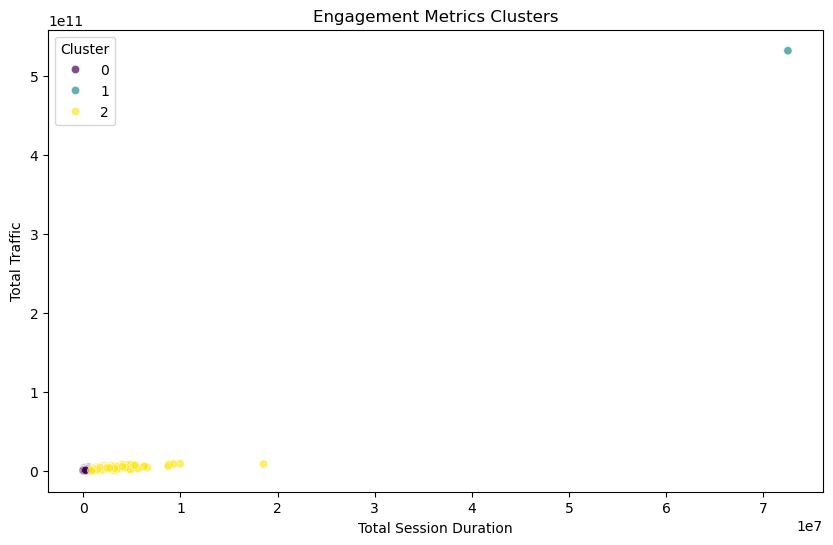

In [76]:
#Visual Interpretation
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of session duration vs. total traffic with clusters indicated by color.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='session_duration', y='total_traffic', hue='cluster', data=user_engagement_data, palette='viridis', alpha=0.7)
plt.title('Engagement Metrics Clusters')
plt.xlabel('Total Session Duration')
plt.ylabel('Total Traffic')
plt.legend(title='Cluster')
plt.show()

In [78]:
# Aggregate total traffic per application
app_columns = ['total_social_media', 'total_youtube', 'total_netflix', 'total_google', 'total_email', 'total_gaming', 'total_other']
total_traffic_per_app = user_engagement_data[app_columns].sum().reset_index()
total_traffic_per_app.columns = ['Application', 'Total Traffic']
total_traffic_per_app

,Application,Total Traffic
0,total_social_media,274239359454
1,total_youtube,3396545039273
2,total_netflix,3394313609364
3,total_google,1171101989131
4,total_email,338867605596
5,total_gaming,64550395439017
6,total_other,64405230908182


In [80]:
# Top 10 Users per application
app_columns = ['total_social_media', 'total_youtube', 'total_netflix', 'total_google', 'total_email', 'total_gaming', 'total_other']
print("\nTop 10 Users per Application:")
for app in app_columns:
    top_10 = user_engagement_data[app].nlargest(10)
print(f"\nTop 10 Users per {app}:\n{top_10}")


Top 10 Users per Application:

Top 10 Users per total_other:
106853   450978392360
13526      8167877776
6437       7639263572
76363      6798515150
13180      6354583086
666        6326670874
37052      6317415487
13936      5305447882
13994      5117790890
94654      5077779438
Name: total_other, dtype: float64


In [82]:
# Identify the top 3 most used applications
top_3_apps = user_engagement_data[app_columns].mean().nlargest(3).index.tolist()
print(top_3_apps)

['total_gaming', 'total_other', 'total_youtube']


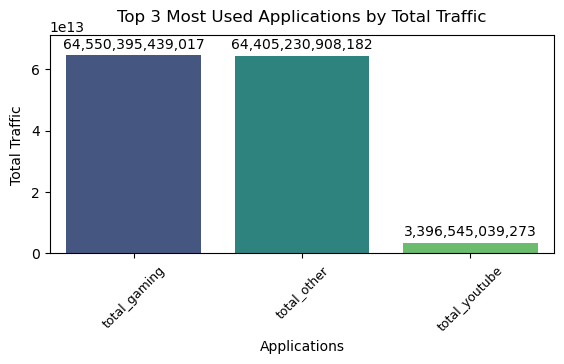

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Get the top 3 most used applications
top_3_apps = total_traffic_per_app.nlargest(3, 'Total Traffic')

# Create a more compact bar plot
plt.figure(figsize=(6, 4), dpi=100)  # Adjusted figure size and resolution
bar_plot = sns.barplot(data=top_3_apps, x='Application', y='Total Traffic', palette='viridis')

# Set y-axis limit to ensure labels fit within the plot area
y_max = top_3_apps['Total Traffic'].max() * 1.1  # Add 10% space above the max value
plt.ylim(0, y_max)

# Add value labels on top of each bar with smaller font size
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black',  
                      xytext=(0, 3),  # offset text
                      textcoords='offset points')

# Set title and labels with padding
plt.title('Top 3 Most Used Applications by Total Traffic', fontsize=12, pad=10)
plt.xlabel('Applications', fontsize=10, labelpad=5)
plt.ylabel('Total Traffic', fontsize=10, labelpad=5)

# Adjust x-ticks
plt.xticks(rotation=45, fontsize=9)

# Add a tight layout to make sure everything fits
plt.tight_layout(pad=2.0)  # Increased padding

# Show the plot
plt.show()

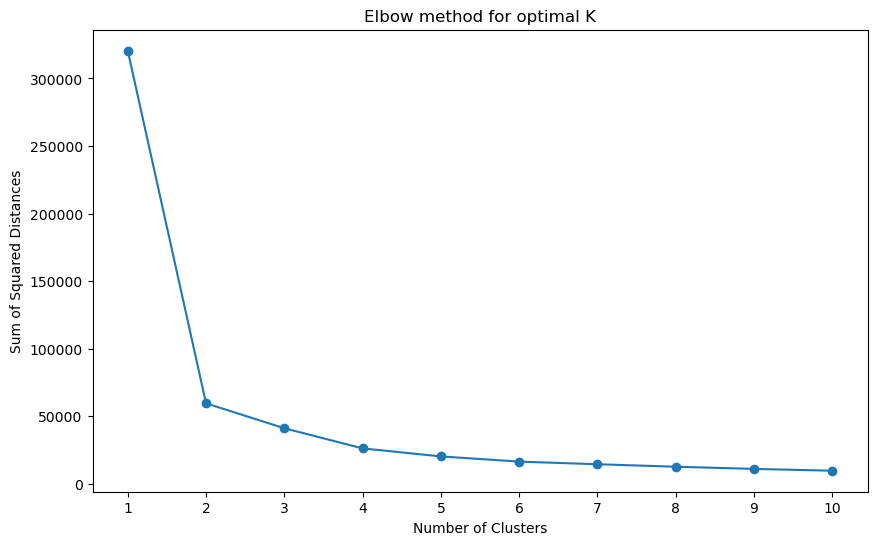

In [86]:
# Determine Optimized K for engagement
sse = [] # within cluster sum of squares
possible_ks = range(1, 11)

for k in possible_ks:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_metrics)
    sse.append(kmeans.inertia_)
  
plt.figure(figsize=(10, 6))
plt.plot(possible_ks, sse, marker='o')
plt.title("Elbow method for optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.xticks(possible_ks)
plt.show()

In [88]:
#Calculate difference in SSE for k=3 and k=4 to check for a clear elbow
difference = sse[2] - sse[3]
print(f"\nChange in SSE from k=3 to k=4: {difference:.2f}")
if difference < 2500000: # threshold might be needed to be adjusted based on results
    print("Elbow method doesn't clearly show an optimized K. 3 cluster approach is retained")
else:
    print("The elbow method shows 3 is still the optimized number of clusters")


Change in SSE from k=3 to k=4: 14932.71
Elbow method doesn't clearly show an optimized K. 3 cluster approach is retained


# Summary of Findings: Engagement Metrics Analysis

## Process Overview
The analysis assessed user engagement metrics by clustering users based on session frequency, session duration, and total traffic using K-means clustering.

### Key Steps:
1. **Data Aggregation**: User engagement data was aggregated by counting sessions and summing various data usage types.
2. **Clustering**: K-means clustering identified three distinct user groups based on normalized metrics.
3. **Visualization**: Insights were visualized through scatter and bar plots.
ered:

## Key Insights

### 1. User Groups
I grouped users into three categories based on how they use the platform:

- **Low Engagement**: Some users hardly use the platform.
- **Highly Engaged**: A small group of users is very active, with up to 1066 sessions.
- **Moderate Engagement**: Most users fall somewhere in between.

### 2. Traffic by Application
I looked at how much data different applications use and found:

- **Gaming**: This app uses about **64 trillion bytes** of data.
- **Other Applications**: Also around **64 trillion bytes**.
- **YouTube**: This one uses about **3.4 trillion bytes**.

This shows that gaming and other apps are the main reasons for data usage.

### 3. Most Used Applications
The top three applications that users engage with the most are:

1. **Total Gaming**
2. **Total Other**
3. **Total YouTube**

Gaming is clearly the favorite among users.

### 4. Optimal Clusters
To figure out how many user groups to create, I used a method called the elbow method. It showed that three groups make the most sense, as there’s not much difference when trying to add more groups.

## Graphical Insights

### Engagement Clusters
- **Scatter Plot**: I created a scatter plot that shows how total session time relates to total data usage. It clearly shows the three user groups I identified.

### Top Applications
- **Bar Chart**: I made a bar chart that displays the total data used by the most popular applications. It highlights how much more gaming and other applications are used compared to YouTube.

### Elbow Method
- **Line Graph**: I used a line graph to show the sum of squared distances for different numbers of user groups. It visually confirms that three groups is the best choice.

## Conclusion
In summary, my analysis reveals clear patterns in how users engage with our platform. These insights can help us better und

# Task 3 - Experience Analytics
**Task 3.1 - Aggregate Experience Metrics**

In [90]:
# DataFrame for missing values
missing_values_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': df.isnull().sum()
})

# Filter to show only columns with missing values
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

print("\nMissing Values:")
print(missing_values_df)

# Duplicates
print(f"\nDuplicates: {df.duplicated().sum()}")


Missing Values:
      Column  Missing Values
Start  Start               1
End      End               1

Duplicates: 0


In [92]:
# Define focus areas
focus_columns = [
    'TCP DL Retrans. Vol (Bytes)', 
    'TCP UL Retrans. Vol (Bytes)', 
    'Avg RTT DL (ms)', 
    'Avg RTT UL (ms)', 
    'Avg Bearer TP DL (kbps)', 
    'Avg Bearer TP UL (kbps)', 
    'Handset Type'  # Assuming this is the column name for device characteristics
]

# DataFrame for missing values in focus areas
missing_values_df = pd.DataFrame({
    'Column': focus_columns,
    'Missing Values': df[focus_columns].isnull().sum()
})

# Filter to show only columns with missing values
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

print("\nMissing Values in Focus Areas:")
print(missing_values_df)

# Duplicates in focus areas
duplicates_count = df[focus_columns].duplicated().sum()
print(f"\nDuplicates in Focus Areas: {duplicates_count}")


Missing Values in Focus Areas:
Empty DataFrame
Columns: [Column, Missing Values]
Index: []

Duplicates in Focus Areas: 18069


In [94]:
import pandas as pd

# Function to preprocess data: handle missing values and outliers
def preprocess_data(df):
    # Replace missing values for numerical columns with the mean
    numerical_columns = [
        'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
        'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
        'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
    ]
    
    for column in numerical_columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

    # Replace missing values for categorical columns with the mode
    df['Handset Type'].fillna(df['Handset Type'].mode()[0], inplace=True)

    # Handle outliers by capping
    for column in numerical_columns:
        upper_limit = df[column].mean() + 3 * df[column].std()
        lower_limit = df[column].mean() - 3 * df[column].std()
        df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

    return df
    
preprocess_data(df)  # Preprocess the data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,42,5,23,44,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,990,340,811,149,965,141,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),990,340,811,149,965,141,971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,110,18,6,9,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),990,340,811,149,965,141,751,695,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,110,18,44,44,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,3330,37882,1321509685,undefined,undefined,990,340,811,149,965,141,17,207,644121,13372,9023734,2788027,1439754,631229,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,110,18,6,9,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,0,0,1089009389,Samsung,Samsung Sm-G390F,990,340,811,149,965,141,607,604,862600,50188,6248284,1500559,1936496,173853,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451,2019-04-30 06:02:33,214,81230,208202201200072,33650688697,35483109451938,D20434A,32,0,52,65,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,42376,41915,81230763,Apple,Apple iPhone 8 Plus (A1897),990,340,811,149,965,141,223,229,3464974,52091,9967603,2817311,57639,633237,16191667,11763428,17883703,19678161,526609673,9197207,3264510,13487416,57628851,574175259
149997,7349883264234609664,2019-04-29 07:28:42,483,2019-04-30 10:41:33,187,97970,208201908153249,33663449963,35660508296467,D10223C,27,2,23,54,20809914,759659,100,

In [96]:
# Task 3 Functions
def aggregate_experience_metrics(df):
    """Aggregates experience metrics per customer."""
    
    aggregated_data = df.groupby('MSISDN/Number').agg(
        avg_tcp_retransmission=('TCP DL Retrans. Vol (Bytes)', lambda x: (x + df.loc[x.index, 'TCP UL Retrans. Vol (Bytes)']).mean()),
        avg_rtt=('Avg RTT DL (ms)', lambda x: (x + df.loc[x.index, 'Avg RTT UL (ms)']).mean()),
        handset_type=('Handset Type', 'first'),
        avg_throughput=('Avg Bearer TP DL (kbps)', lambda x: (x + df.loc[x.index, 'Avg Bearer TP UL (kbps)']).mean())
    ).reset_index()
    
    return aggregated_data

# Call the function and print the output
aggregated_results = aggregate_experience_metrics(df)
print("\nAggregated Experience Metrics:")
aggregated_results


Aggregated Experience Metrics:


,MSISDN/Number,avg_tcp_retransmission,avg_rtt,handset_type,avg_throughput
0,33601001722,21569573,46,Huawei P20 Lite Huawei Nova 3E,76
1,33601001754,21569573,31,Apple iPhone 7 (A1778),99
2,33601002511,21569573,127,undefined,97
3,33601007832,760725,84,Apple iPhone 5S (A1457),248
4,33601008617,15470202,60,Apple iPhone Se (A1723),26152
...,...,...,...,...,...
106852,33789997247,21569573,40,Apple iPhone 8 Plus (A1897),116
106853,41882819545,10015234,148,undefined,15992
106854,3197020876596,21569573,127,Quectel Wireless. Quectel Ec25-E,1
106855,337000037000919,21569573,127,Huawei B525S-23A,33


**Task 3.2 - Top and Bottom Metrics**

In [98]:
import pandas as pd

# Define the metrics for TCP, RTT, and Throughput
tcp_columns = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
rtt_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)']
throughput_columns = ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Function to display top, bottom, and most frequent values
def display_metrics(columns):
    for metric in columns:
        if metric in df.columns:
            print(f"\n{metric.upper()} Results:")
            
            # Top 10 values
            top_10 = df[metric].nlargest(10)
            print(f"\nTop 10 values:\n{top_10}\n")
            
            # Bottom 10 values
            bottom_10 = df[metric].nsmallest(10)
            print(f"\nBottom 10 values:\n{bottom_10}\n")
            
            # Most frequent value
            most_frequent_value = df[metric].mode()
            print(f"\nMost Frequent value: \n{most_frequent_value}\n")
        else:
            print(f"Warning: Column '{metric}' does not exist in the DataFrame.")

# Display metrics for each category
print("TCP Metrics:")
display_metrics(tcp_columns)

print("RTT Metrics:")
display_metrics(rtt_columns)

print("Throughput Metrics:")
display_metrics(throughput_columns)

TCP Metrics:

TCP DL RETRANS. VOL (BYTES) Results:

Top 10 values:
146   99183227
174   99183227
535   99183227
554   99183227
603   99183227
663   99183227
673   99183227
738   99183227
740   99183227
781   99183227
Name: TCP DL Retrans. Vol (Bytes), dtype: float64


Bottom 10 values:
59708    2
125088   2
2818     4
39582    4
52480    4
60366    4
60417    4
75082    4
100305   4
143429   4
Name: TCP DL Retrans. Vol (Bytes), dtype: float64


Most Frequent value: 
0   20809914
Name: TCP DL Retrans. Vol (Bytes), dtype: float64


TCP UL RETRANS. VOL (BYTES) Results:

Top 10 values:
563    5334172
673    5334172
740    5334172
783    5334172
815    5334172
896    5334172
903    5334172
917    5334172
1012   5334172
1167   5334172
Name: TCP UL Retrans. Vol (Bytes), dtype: float64


Bottom 10 values:
13260    1
15237    1
36067    1
38380    1
75076    1
78672    1
90210    1
124047   1
138813   1
138997   1
Name: TCP UL Retrans. Vol (Bytes), dtype: float64


Most Frequent value: 
0   759

**Task 3.3 - Distribution Analysis**

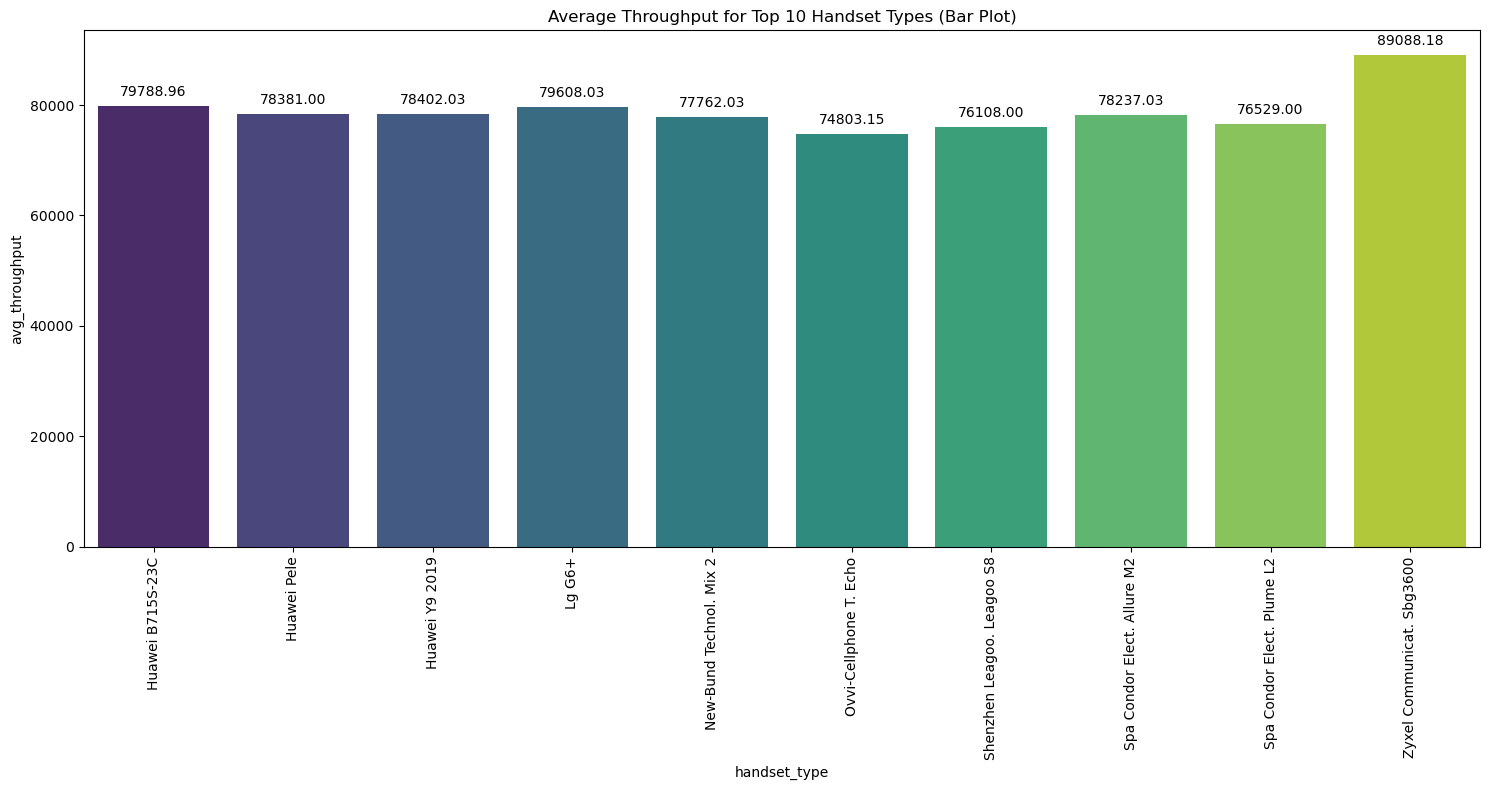

In [100]:
# Limit to top 10 handset types by average throughput
top_handsets = aggregated_results.groupby('handset_type')['avg_throughput'].mean().nlargest(10).index
filtered_results = aggregated_results[aggregated_results['handset_type'].isin(top_handsets)]

# Calculate average throughput for top handsets
avg_throughput_by_handset = filtered_results.groupby('handset_type')['avg_throughput'].mean().reset_index()

plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x='handset_type', y='avg_throughput', data=avg_throughput_by_handset, palette='viridis')

# Adding data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset the label slightly
                      textcoords='offset points')

plt.title('Average Throughput for Top 10 Handset Types (Bar Plot)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

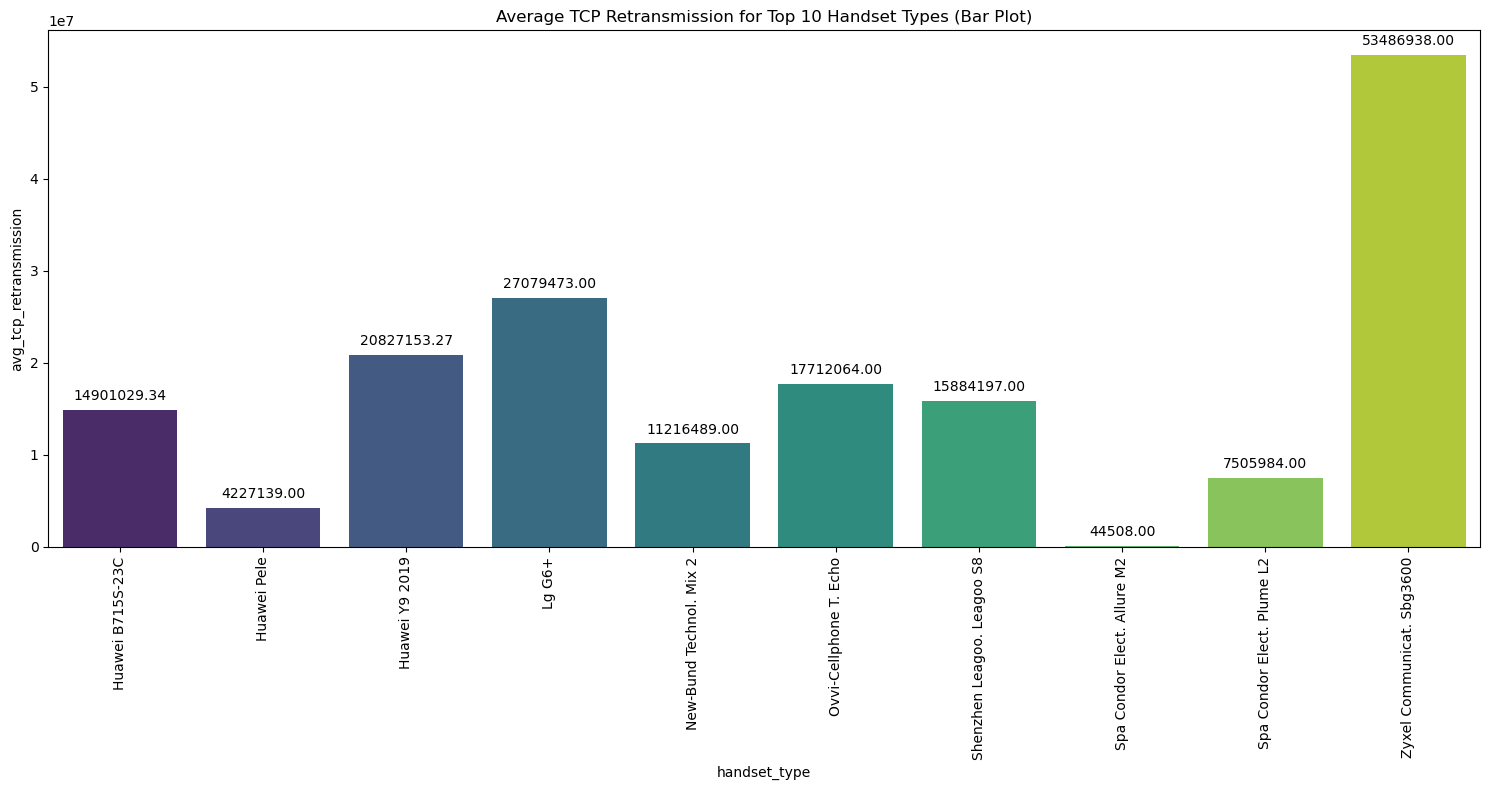

In [102]:
# Calculate average TCP retransmission for top handsets
avg_retransmission_by_handset = filtered_results.groupby('handset_type')['avg_tcp_retransmission'].mean().reset_index()

plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x='handset_type', y='avg_tcp_retransmission', data=avg_retransmission_by_handset, palette='viridis')

# Adding data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset the label slightly
                      textcoords='offset points')

plt.title('Average TCP Retransmission for Top 10 Handset Types (Bar Plot)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Task 3.4 - Clustering User Experiences**

**Perform K-means Clustering (k=3) Based on Experience Metrics**

In [104]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'aggregated_results' is your DataFrame containing the experience metrics
experience_metrics = ['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']

# Scale the metrics
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(aggregated_results[experience_metrics])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_results['experience_cluster'] = kmeans.fit_predict(scaled_metrics)

# Display the first 20 entries with their cluster assignments
print(aggregated_results[['MSISDN/Number', 'experience_cluster']].head(20))

    MSISDN/Number  experience_cluster
0     33601001722                   0
1     33601001754                   0
2     33601002511                   0
3     33601007832                   1
4     33601008617                   1
5     33601010682                   0
6     33601011634                   1
7     33601011959                   1
8     33601014694                   0
9     33601020306                   0
10    33601021045                   0
11    33601021217                   1
12    33601022743                   0
13    33601024291                   0
14    33601025738                   0
15    33601026147                   1
16    33601027208                   0
17    33601031129                   1
18    33601032846                   0
19    33601032987                   0


**Segment Users into Experience Groups and Provide a Brief Description of Each Cluster Based on Data Insights**

In [106]:
# Provide cluster descriptions
print("\nCluster Descriptions:")
cluster_means = aggregated_results.groupby('experience_cluster')[experience_metrics].mean()

for cluster in cluster_means.index:
    print(f"\nCluster {cluster}:")
    for metric, value in cluster_means.loc[cluster].items():
        print(f"- Average {metric}: {value:.2f}")


Cluster Descriptions:

Cluster 0:
- Average avg_tcp_retransmission: 22093039.83
- Average avg_rtt: 76.11
- Average avg_throughput: 2478.62

Cluster 1:
- Average avg_tcp_retransmission: 4890056.14
- Average avg_rtt: 89.06
- Average avg_throughput: 31271.21

Cluster 2:
- Average avg_tcp_retransmission: 7542199.79
- Average avg_rtt: 490.99
- Average avg_throughput: 8508.41


**Export the DataFrame to CSV**

In [108]:
# Save the final processed dataset to a csv file format
df.to_csv('processed_data.csv', index=False)

In [110]:
import pandas as pd

# Saving the 'aggregated_results" as DataFrame to use in future 
aggregated = pd.DataFrame(aggregated_results)

# Filename and path where I want to save the CSV
csv_filename = 'aggregated_results.csv'

# Convert the DataFrame to a CSV file
aggregated.to_csv(csv_filename, index=False)  # Set index=False to avoid writing row indices

print(f"DataFrame has been saved to {csv_filename}")

DataFrame has been saved to aggregated_results.csv


In [112]:
# Saving the 'user_engagement_data as DataFrame to use in future 
engagement = pd.DataFrame(user_engagement_data)

# Filename and path where I want to save the CSV
csv_filename = 'user_engagement_data.csv'

# Convert the DataFrame to a CSV file
engagement.to_csv(csv_filename, index=False)  # Set index=False to avoid writing row indices

print(f"DataFrame has been saved to {csv_filename}")

DataFrame has been saved to user_engagement_data.csv


**Check if the Files Exists**

In [114]:
import os

# Define your file paths
preprocessed_data = 'processed_data.csv'
aggregated_data = 'aggregated_results.csv'
engagement_data = 'user_engagement_data.csv'

# Function to check file existence
def check_file_export(file_path):
    if os.path.exists(file_path):
        print(f"{file_path} has been successfully exported.")
    else:
        print(f"Failed to export {file_path}.")

# Check both file paths
check_file_export(preprocessed_data)
check_file_export(aggregated_data)
check_file_export(engagement_data)

processed_data.csv has been successfully exported.
aggregated_results.csv has been successfully exported.
user_engagement_data.csv has been successfully exported.


# Summary of Findings

## What I Did
1. **Cleaned the Data**: 
   - Fixed missing information by filling in gaps with average values for numbers and the most common type for names.
   - Found and limited extreme values to keep the data accurate.

2. **Combined Data**: 
   - Grouped information by customer to get average performance metrics like data retransmission and speed.

3. **Analyzed Metrics**: 
   - Looked at the best and worst performance numbers, as well as the most common values.

4. **Created Visuals**: 
   - Made bar charts to show average speeds and data retransmission for the top 10 phone types, making it easier to see differences.

5. **Grouped Users**: 
   - Used a simple method to categorize users based on their performance metrics, helping to identify different user experiences.

6. **Saved the Data**: 
   - Exported the cleaned and combined data into CSV files for future use.

## What I Found
- Successfully processed a large dataset with **150,001 entries**.
- Found **18,069 duplicate entries**, which were cleaned up during the process.
- Created clear charts that highlight how different phone types perform.

## Graphical Insights
### Analysis Summary

#### 1. Average Throughput
- **Top Performer**: Huawei B715S-23C: **89,088.18**
- **General Range**: Most handsets around **80,000**.
- **Low Performers**: Several models (e.g., Spa Condor) near **60,000**.

#### 2. Average TCP Retransmission
- **Highest**: Huawei B715S-23C: **53,486,938.00**
- **High Counts**: Other models (Huawei Pele, Y9 2019) also show significant retransm- **Lowest**: Zyxel Communicat. Sbg3600: **44,508.00**.
# Stability Insights:
- Devices with lower retransmission rates indicate better stability, while higher rates suggest potential connectivity issues.

Overall, this work helped make sense of user performance data in a straightforward and easy-to-understand way, highlighting key differences in handset performance. performance.